In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(URL cross)(3).csv")
data.head()

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
0,1,4.117355e-05,9.999588e-01,4.117355e-05,9.999588e-01,4.117355e-05,9.999588e-01
1,1,4.554135e-12,1.000000e+00,4.554135e-12,1.000000e+00,4.554135e-12,1.000000e+00
2,0,9.999951e-01,4.935975e-06,9.999951e-01,4.935975e-06,9.999951e-01,4.935975e-06
3,0,1.000000e+00,2.150433e-19,1.000000e+00,2.150433e-19,1.000000e+00,2.150433e-19
4,1,1.044356e-01,8.955644e-01,1.044356e-01,8.955644e-01,1.044356e-01,8.955644e-01


In [4]:
data.shape

(2938, 7)

In [5]:

data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   mlp_prediction_non    2938 non-null   float64
 2   mlp_prediction_phish  2938 non-null   float64
 3   nn_prediction_non     2938 non-null   float64
 4   nn_prediction_phish   2938 non-null   float64
 5   nn2_prediction_non    2938 non-null   float64
 6   nn2_prediction_phish  2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 1.1013 - accuracy: 0.0189 - val_loss: 1.0228 - val_accuracy: 0.0306
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.9652 - accuracy: 0.0185 - val_loss: 0.8976 - val_accuracy: 0.0272
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.0182 - val_loss: 0.7852 - val_accuracy: 0.0272
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.1933 - val_loss: 0.6876 - val_accuracy: 0.7483
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7542 - val_loss: 0.6045 - val_accuracy: 0.7483
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7542 - val_loss: 0.5361 - val_accuracy: 0.7483
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7542 - val_loss: 0.4814 - val_accuracy: 0.7483
Epoch 8/100
8

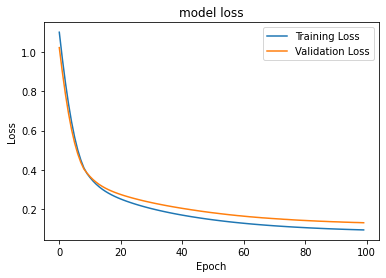

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       220
           1       0.96      0.92      0.94        74

    accuracy                           0.97       294
   macro avg       0.97      0.95      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9693877551020408
[[217   3]
 [  6  68]]
Precision: 0.9577
Recall: 0.9189
F1 Score: 0.9379
True Positive 68
True Negative 217
False Positive 3
False Negative 6
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5118 - accuracy: 0.8434 - val_loss: 0.3358 - val_accuracy: 0.9694
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.9803 - val_loss: 0.2338 - val_accuracy: 0.9694
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9803 - val_loss: 0.1924 - val_accuracy: 0.9694
Epoch 4/100
83/83 [==============================] - 0s 2

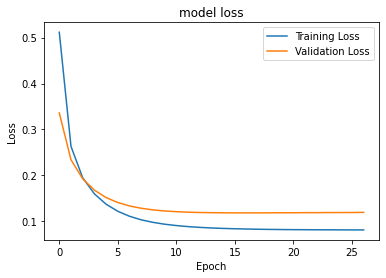

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       220
           1       0.96      0.93      0.95        74

    accuracy                           0.97       294
   macro avg       0.97      0.96      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9727891156462585
[[217   3]
 [  5  69]]
Precision: 0.9583
Recall: 0.9324
F1 Score: 0.9452
True Positive 69
True Negative 217
False Positive 3
False Negative 5
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4543 - accuracy: 0.9803 - val_loss: 0.3327 - val_accuracy: 0.9728
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9803 - val_loss: 0.2169 - val_accuracy: 0.9728
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9807 - val_loss: 0.1609 - val_accuracy: 0.9728
Epoch 4/100
83/83 [==============================] - 0s 2

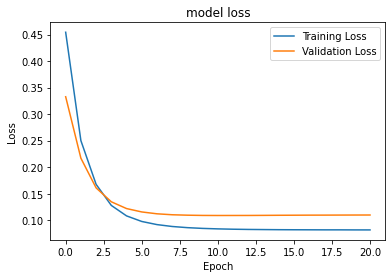

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       212
           1       0.95      0.95      0.95        82

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9727891156462585
[[208   4]
 [  4  78]]
Precision: 0.9512
Recall: 0.9512
F1 Score: 0.9512
True Positive 78
True Negative 208
False Positive 4
False Negative 4
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.8633 - accuracy: 0.5083 - val_loss: 0.5330 - val_accuracy: 0.9830
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.9792 - val_loss: 0.3528 - val_accuracy: 0.9864
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.9788 - val_loss: 0.2736 - val_accuracy: 0.9864
Epoch 4/100
83/83 [==============================] - 0s 2

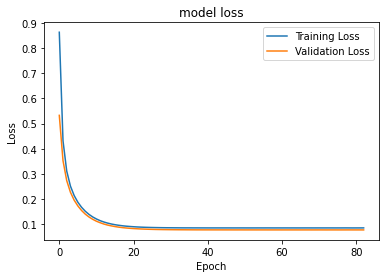

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       222
           1       0.97      0.96      0.97        72

    accuracy                           0.98       294
   macro avg       0.98      0.97      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
[[220   2]
 [  3  69]]
Precision: 0.9718
Recall: 0.9583
F1 Score: 0.9650
True Positive 69
True Negative 220
False Positive 2
False Negative 3
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.2056 - accuracy: 0.9482 - val_loss: 0.1069 - val_accuracy: 0.9830
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9796 - val_loss: 0.0792 - val_accuracy: 0.9830
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9792 - val_loss: 0.0721 - val_accuracy: 0.9830
Epoch 4/100
83/83 [==============================] - 0s 2

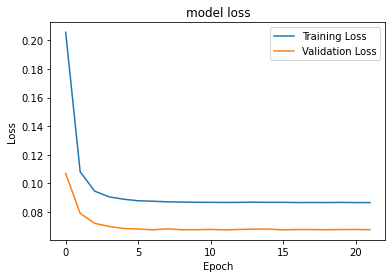

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       225
           1       0.96      0.97      0.96        69

    accuracy                           0.98       294
   macro avg       0.97      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
[[222   3]
 [  2  67]]
Precision: 0.9571
Recall: 0.9710
F1 Score: 0.9640
True Positive 67
True Negative 222
False Positive 3
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6507 - accuracy: 0.6944 - val_loss: 0.3602 - val_accuracy: 0.9796
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.9800 - val_loss: 0.2197 - val_accuracy: 0.9796
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9803 - val_loss: 0.1630 - val_accuracy: 0.9796
Epoch 4/100
83/83 [==============================] - 0s 2

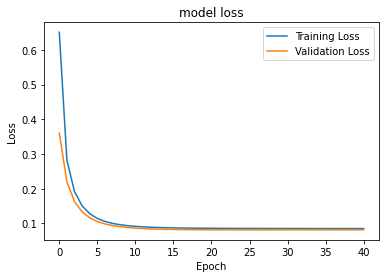

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       226
           1       0.97      0.94      0.96        68

    accuracy                           0.98       294
   macro avg       0.98      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
[[224   2]
 [  4  64]]
Precision: 0.9697
Recall: 0.9412
F1 Score: 0.9552
True Positive 64
True Negative 224
False Positive 2
False Negative 4
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5157 - accuracy: 0.9550 - val_loss: 0.4125 - val_accuracy: 0.9932
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.9792 - val_loss: 0.2723 - val_accuracy: 0.9932
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9792 - val_loss: 0.1900 - val_accuracy: 0.9932
Epoch 4/100
83/83 [==============================] - 0s 2

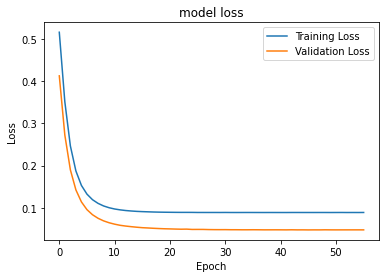

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       224
           1       0.99      0.97      0.98        70

    accuracy                           0.99       294
   macro avg       0.99      0.98      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9897959183673469
[[223   1]
 [  2  68]]
Precision: 0.9855
Recall: 0.9714
F1 Score: 0.9784
True Positive 68
True Negative 223
False Positive 1
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6265 - accuracy: 0.6789 - val_loss: 0.4159 - val_accuracy: 0.9932
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.9784 - val_loss: 0.2507 - val_accuracy: 0.9932
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9784 - val_loss: 0.1739 - val_accuracy: 0.9932
Epoch 4/100
83/83 [==============================] - 0s 2

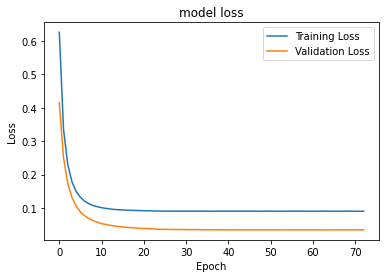

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       228
           1       1.00      0.97      0.98        66

    accuracy                           0.99       294
   macro avg       1.00      0.98      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9931972789115646
[[228   0]
 [  2  64]]
Precision: 1.0000
Recall: 0.9697
F1 Score: 0.9846
True Positive 64
True Negative 228
False Positive 0
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5184 - accuracy: 0.8775 - val_loss: 0.4099 - val_accuracy: 0.9693
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9803 - val_loss: 0.2822 - val_accuracy: 0.9727
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9803 - val_loss: 0.2150 - val_accuracy: 0.9727
Epoch 4/100
83/83 [==============================] - 0s 2

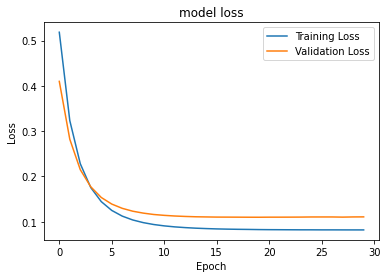

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       211
           1       0.99      0.91      0.95        82

    accuracy                           0.97       293
   macro avg       0.98      0.95      0.97       293
weighted avg       0.97      0.97      0.97       293

Accuracy: 0.9726962457337884
[[210   1]
 [  7  75]]
Precision: 0.9868
Recall: 0.9146
F1 Score: 0.9494
True Positive 75
True Negative 210
False Positive 1
False Negative 7
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4876 - accuracy: 0.7932 - val_loss: 0.3206 - val_accuracy: 0.9795
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9784 - val_loss: 0.1915 - val_accuracy: 0.9795
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9800 - val_loss: 0.1399 - val_accuracy: 0.9795
Epoch 4/100
83/83 [==============================] - 0s 2

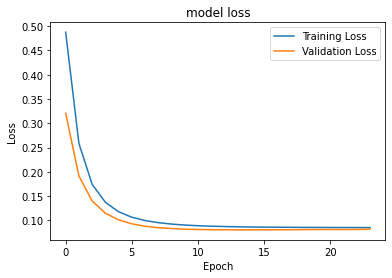

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       226
           1       0.94      0.99      0.96        67

    accuracy                           0.98       293
   macro avg       0.97      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293

Accuracy: 0.9829351535836177
[[222   4]
 [  1  66]]
Precision: 0.9429
Recall: 0.9851
F1 Score: 0.9635
True Positive 66
True Negative 222
False Positive 4
False Negative 1
Average Validation Accuracy: 0.9799168814283392


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

